# Missing Values

In our dataset, there are many missing values. Here we first find the distribution of all these columns.

In [37]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ks_2samp, chi2_contingency

In [74]:
# First, we can see the missing rate of all these data
df = pd.read_csv("T2DM.csv")
# check the missing value for each of the data
missing_values_count = df.isnull().sum()
# Calculate the missing rate for each column
missing_rate = (missing_values_count / len(df)) * 100
missing_rate_table = pd.DataFrame({'Column': df.columns, 'Missing Rate (%)': missing_rate}).reset_index(drop=True)
print(missing_rate_table)

print(len(df))
print(len(df['ID'].unique()))
print(df['DM'].unique())
print(df["Age"].unique())

       Column  Missing Rate (%)
0          ID          0.000000
1          DM          0.000000
2         Age          0.000000
3     Smoking         34.180061
4     Alcohol         54.321681
5      Income         13.397775
6          PA         53.074070
7         BMI         10.025851
8        Race          0.000000
9         Edu         37.551984
10  Menopause          0.000000
8897
8897
[2 3 1 9]
[ 2. 66. 18. 13. 75. 56. 67. 54. 71. 61. 22. 45.  1. 60. 64.  5.  9. 70.
 53. 42. 57. 20. 72. 11. 52.  8. 26. 10. 25.  7. 73. 63. 55. 44. 74. 40.
 19. 36. 80.  6.  3. 69. 41. 47. 32. 46. 21. 34. 31. 12. 62. 59. 14. 24.
 16. 58. 68. 38. 48. 27. 35. 50. 28. 29. 43. 39. 76. 37. 30. 78. 15. 49.
 33. 23. 79.  4. 17. 77. 51. 65.]


From the table above, we can see that ID is unique among all observations, which means each observation corresponds to a unique survey.
For the response (DM Condition), there are 4 possibilities (1 for yes, 2 for no, 3 for boarder line which is usually considered as yes, 9 for don't know)
For the age, everyone provides an age but some of them may be unreasonable.
Besides, race and manopause features are not missing. 
So, before we do the modeling, we need to deal with the missing value first.

count    8897.000000
mean       35.711925
std        25.043044
min         1.000000
25%        12.000000
50%        33.000000
75%        59.000000
max        80.000000
Name: Age, dtype: float64


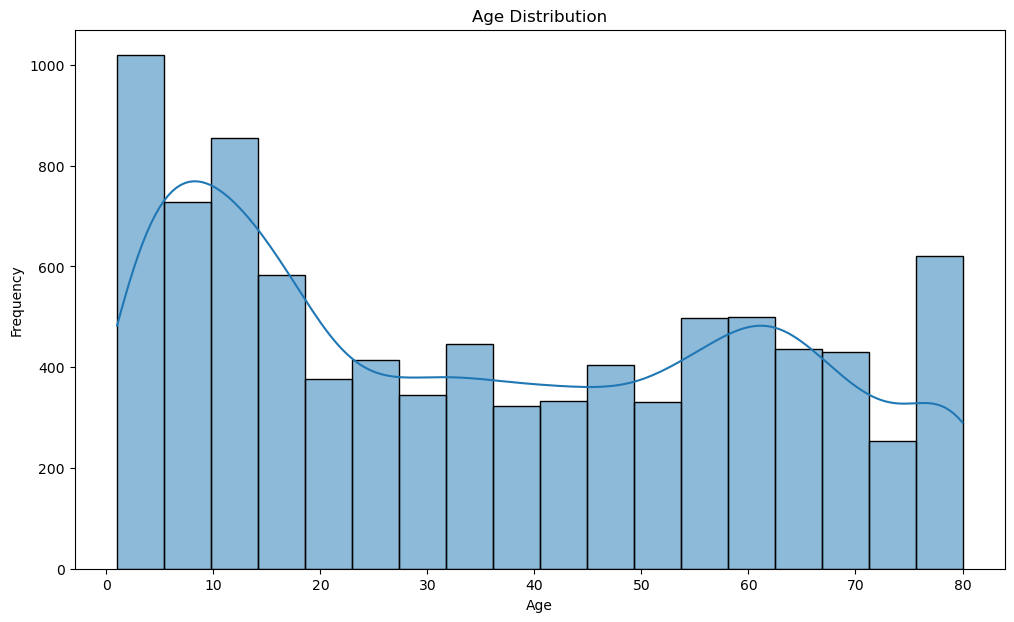

In [61]:
# First consider the Age, which is the only continous var in our dataset
age_stats = df['Age'].describe()
print(age_stats)
# Plot histogram for 'Age'
plt.figure(figsize=(12, 7))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Here, ID is the observation records which is not used to our imputation process
# DM is the response for us to compute, so we also exclude it from imputing
features_to_impute = df.drop(columns=['ID', 'DM'])
# Initialize the IterativeImputer with a RandomForest estimator
imp = IterativeImputer(estimator=RandomForestClassifier(n_estimators=100), max_iter=50, random_state=0)
# Fit the imputer on the data
imp.fit(features_to_impute)
# Transform the data (this performs the imputation)
imputed_data = imp.transform(features_to_impute)

df_imputed = pd.DataFrame(imputed_data, columns=features_to_impute.columns)

c:\Users\75994\anaconda3\envs\pythonProject\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [72]:
df_final = df.copy()
df_final.update(df_imputed)
df_final.to_csv("T2DM_MissingFilled.csv", index=False)

### Chi-Square Test (χ²)

- **Purpose**: The Chi-square test is used to determine whether there's a significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

- **Formula**: 
χ² = Σ((O - E)² / E)

Where `O` represents the observed frequency, and `E` is the expected frequency.

- **Interpretation**: A high χ² value suggests that the differences between the observed and expected data are greater than what would be expected by chance, allowing us to reject the null hypothesis of independence between categorical variables (or the hypothesis that the distributions are the same).

### Cramer's V

- **Purpose**: Cramer's V is a measure derived from the Chi-square statistic that provides a quantitative measure of the strength of association between two nominal variables.

- **Formula**: 
V = √(χ² / (n * min(r-1, c-1)))

Where `n` is the total number of observations, `r` is the number of rows in the table, and `c` is the number of columns.

- **Interpretation**: Cramer's V ranges from 0 to 1, where 0 indicates no association between variables, and 1 indicates a strong association. It helps to understand how strongly two categorical variables are related or how closely the imputed data matches the original data's distribution, normalized by the sizes of the dataset and the table dimensions.


Smoking:
         Before Imputation (%)  After Imputation (%)
Smoking                                             
0.0                  39.305384             73.485445
NaN                  34.180061                   NaN
1.0                  15.038777             15.038777
2.0                  11.475778             11.475778

Alcohol:
         Before Imputation (%)  After Imputation (%)
Alcohol                                             
NaN                  54.321681                   NaN
0.0                   6.575250             25.064629
1.0                  24.435203             47.499157
2.0                  10.205687             17.297966
3.0                   4.462178             10.138249

Income:
        Before Imputation (%)  After Imputation (%)
Income                                             
1.0                 28.605148             34.011465
2.0                 34.506013             39.642576
3.0                 23.491064             26.345959
NaN                 13.

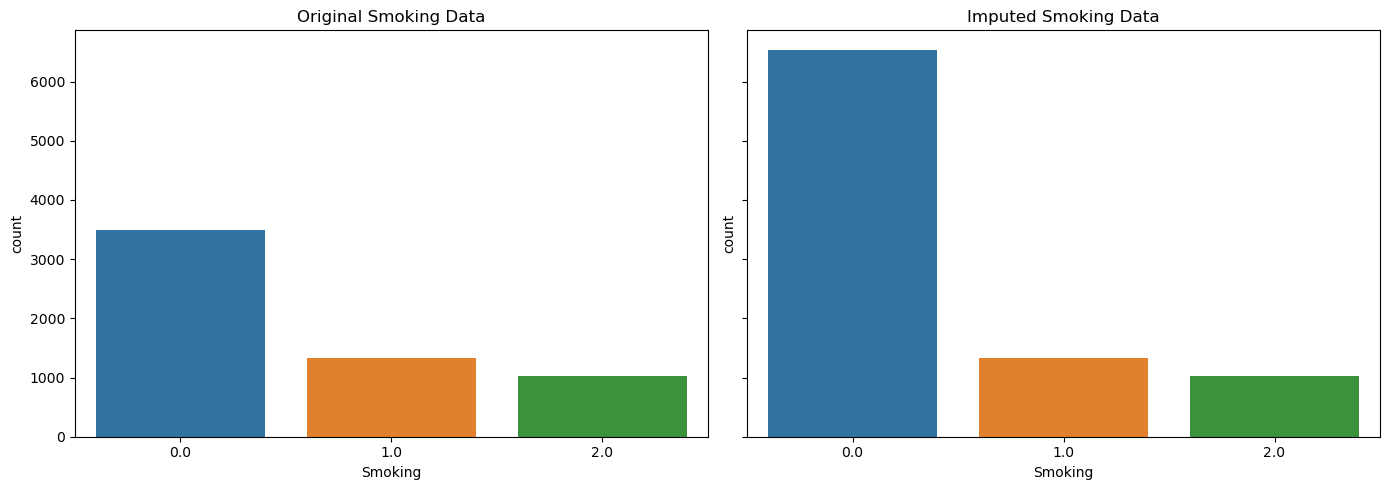

Chi-squared test for Smoking: χ²=307.79, p=0.000, Cramer's V=0.14
Conclusion: Significant difference with minor significance.


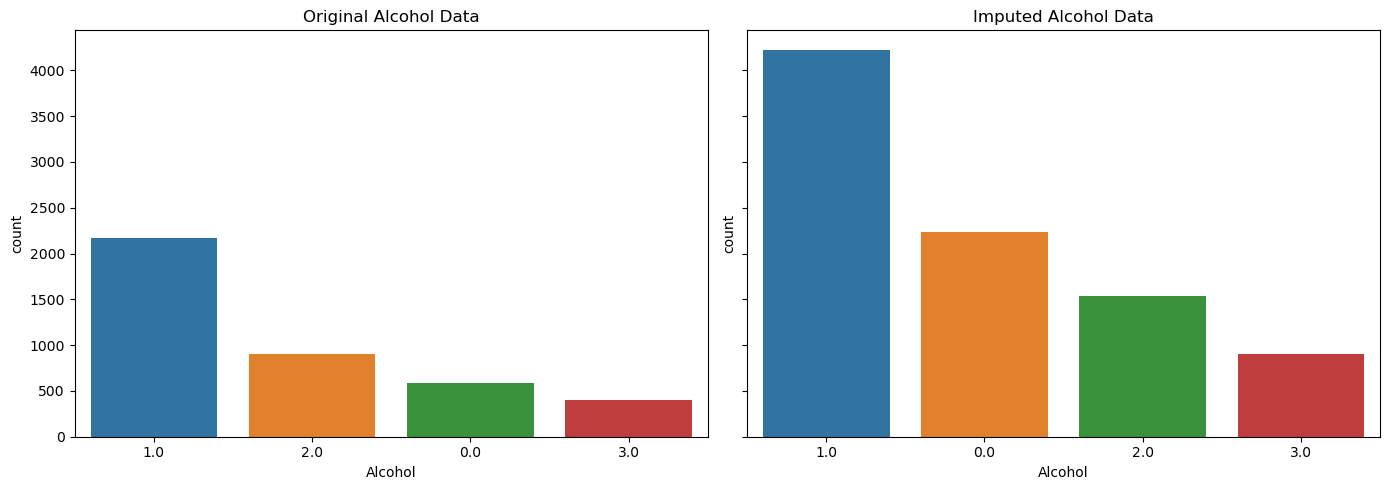

Chi-squared test for Alcohol: χ²=204.52, p=0.000, Cramer's V=0.13
Conclusion: Significant difference with minor significance.


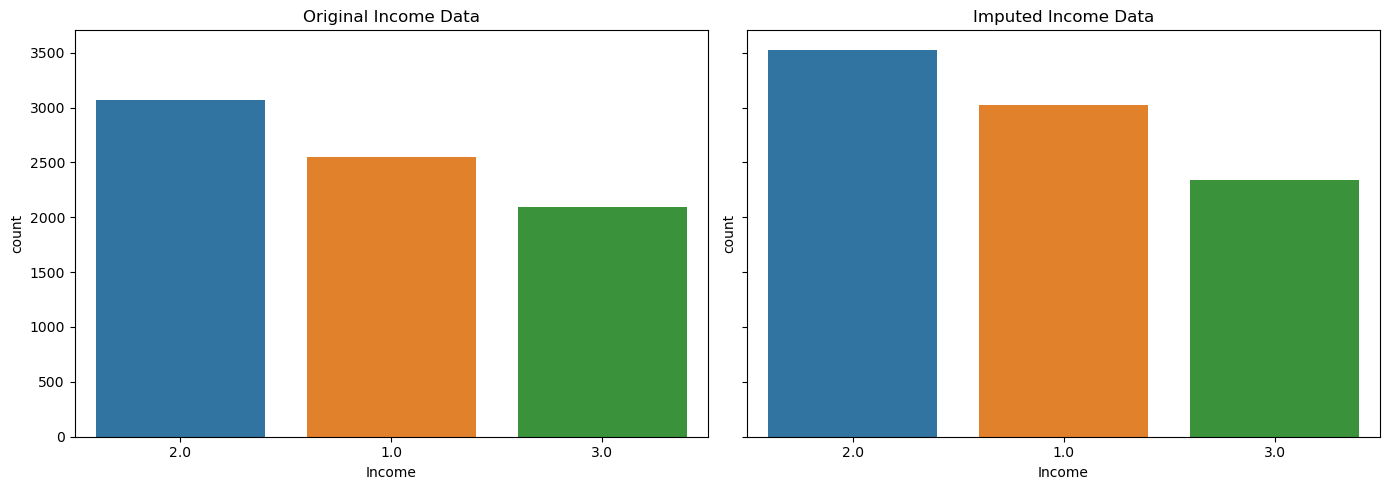

Chi-squared test for Income: χ²=2.17, p=0.339, Cramer's V=0.01
Conclusion: No significant difference, imputation likely reasonable.


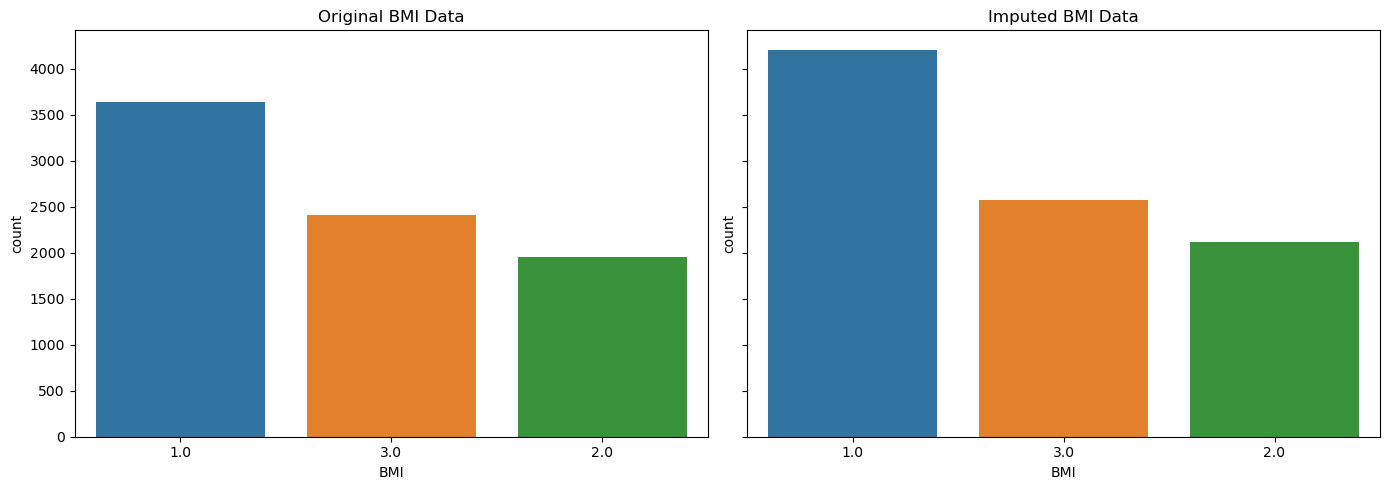

Chi-squared test for BMI: χ²=5.65, p=0.059, Cramer's V=0.02
Conclusion: No significant difference, imputation likely reasonable.


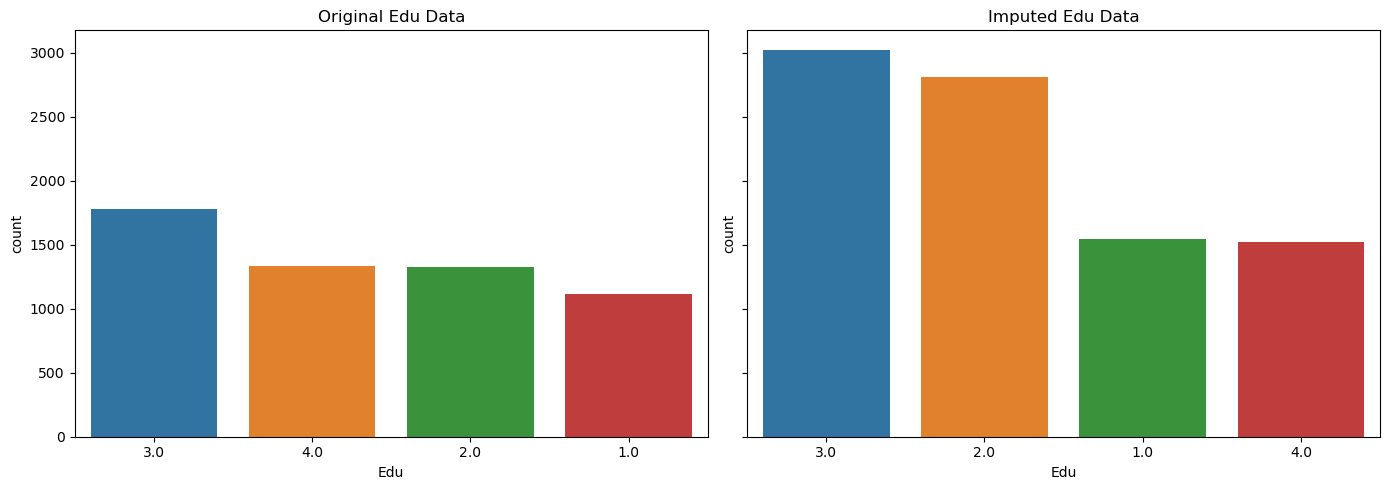

Chi-squared test for Edu: χ²=172.97, p=0.000, Cramer's V=0.11
Conclusion: Significant difference with minor significance.


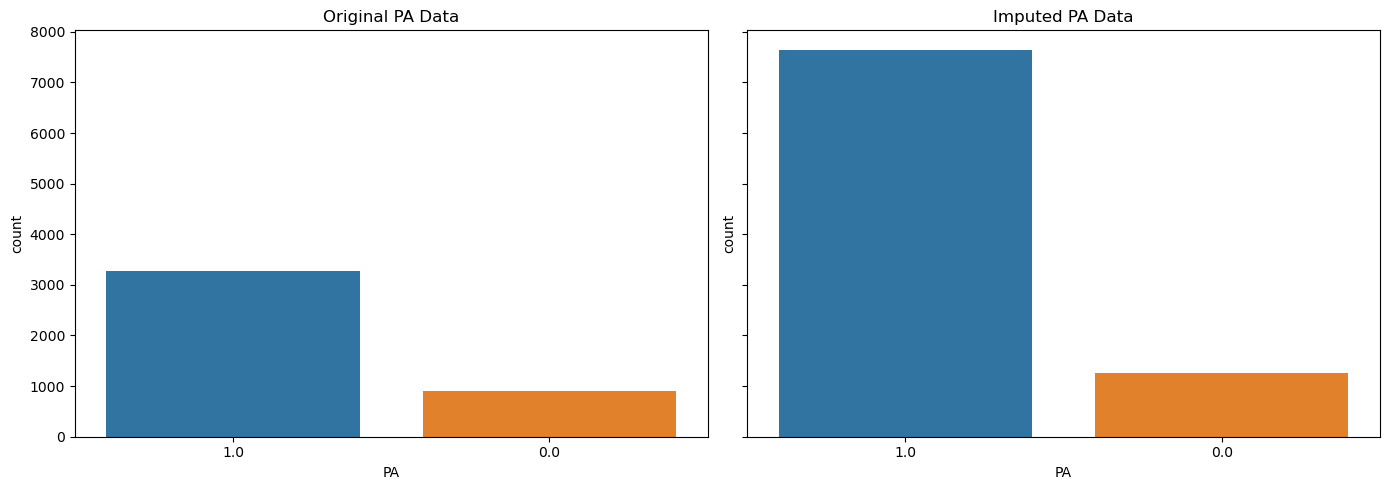

Chi-squared test for PA: χ²=119.11, p=0.000, Cramer's V=0.10
Conclusion: Significant difference with minor significance.


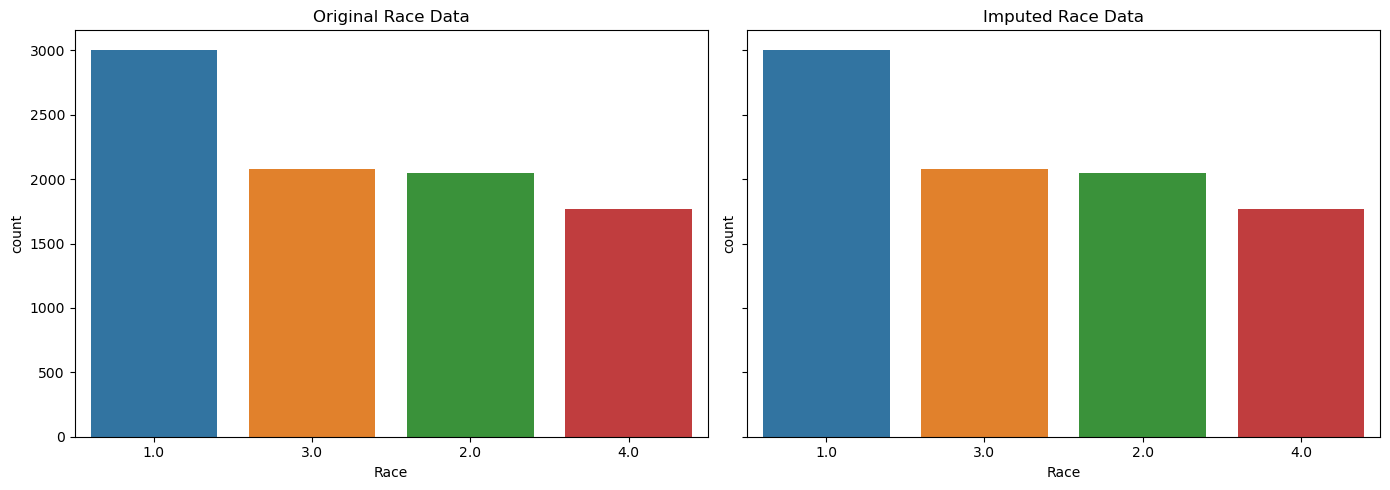

Chi-squared test for Race: χ²=0.00, p=1.000, Cramer's V=0.00
Conclusion: No significant difference, imputation likely reasonable.


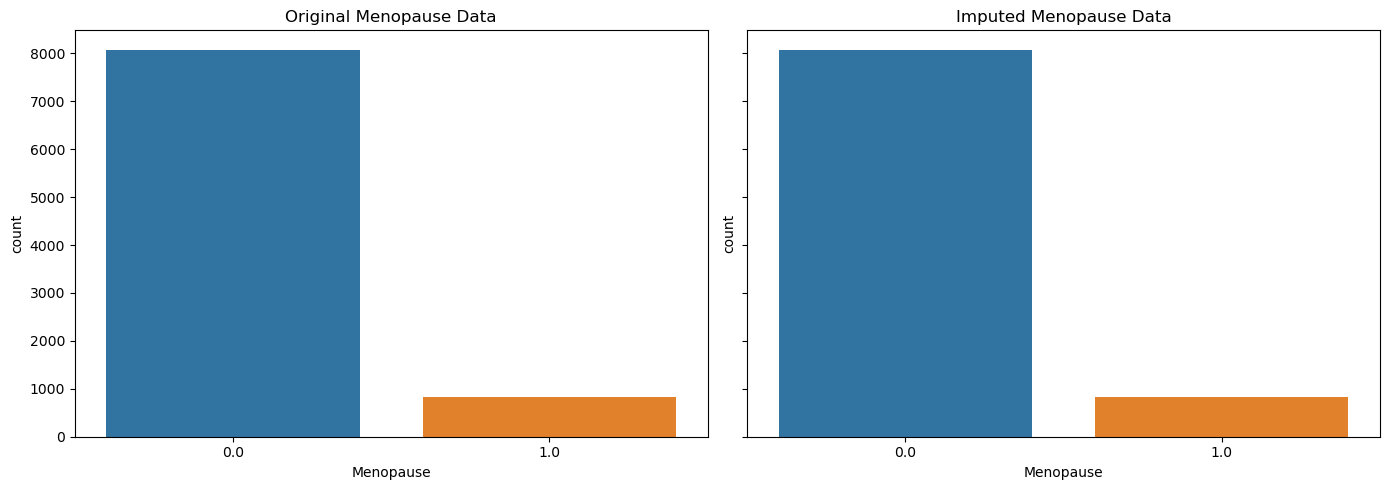

Chi-squared test for Menopause: χ²=0.00, p=1.000, Cramer's V=0.00
Conclusion: No significant difference, imputation likely reasonable.


In [82]:
# Function to plot the distribution of a categorical/ordinal variable
def plot_categorical_distribution(df_original, df_imputed, column):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    sns.countplot(x=column, data=df_original, ax=ax[0], order=df_original[column].dropna().value_counts().index)
    ax[0].set_title(f'Original {column} Data')
    sns.countplot(x=column, data=df_imputed, ax=ax[1], order=df_imputed[column].value_counts().index)
    ax[1].set_title(f'Imputed {column} Data')
    plt.tight_layout()
    plt.show()

def calculate_value_percentages(df_original, df_imputed, columns):
    result = {}
    for column in columns:
        before = df_original[column].value_counts(dropna=False, normalize=True) * 100
        after = df_imputed[column].value_counts(dropna=False, normalize=True) * 100
        result[column] = pd.DataFrame({'Before Imputation (%)': before, 'After Imputation (%)': after})
    return result

def chi_squared_test(df_original, df_imputed, column):
    # Get value counts for both original and imputed data, including all possible categories
    all_categories = pd.concat([df_original[column], df_imputed[column]]).dropna().unique()
    observed = df_original[column].value_counts(dropna=False).reindex(all_categories, fill_value=0)
    imputed = df_imputed[column].value_counts(dropna=False).reindex(all_categories, fill_value=0)

    # Construct the contingency table
    contingency_table = np.array([observed, imputed])

    # Run the chi-squared test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Calculate Cramer's V for effect size
    n = contingency_table.sum()
    cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    print(f"Chi-squared test for {column}: χ²={chi2:.2f}, p={p:.3f}, Cramer's V={cramer_v:.2f}")

    # Adding a conclusion in the same print statement for conciseness
    if p > 0.05:
        print("Conclusion: No significant difference, imputation likely reasonable.")
    else:
        # We choose 0.15 to be minor significance
        conclusion = "minor significance." if cramer_v < 0.15 else "strong significance."
        print(f"Conclusion: Significant difference with {conclusion}")

ordinal_columns = ['Smoking', 'Alcohol', 'Income', 'BMI','Edu']  # Add or adjust columns
categorical_columns = ['PA', 'Race', 'Menopause']  # Add or adjust columns

columns_to_analyze = ['Smoking', 'Alcohol', 'Income', 'PA', 'BMI', 'Race', 'Edu', 'Menopause']  # Adjust the list as needed
percentages = calculate_value_percentages(df, df_imputed, columns_to_analyze)
for column, data in percentages.items():
    print(f"{column}:\n{data}\n")

for column in ordinal_columns:
    plot_categorical_distribution(df, df_imputed, column)
    chi_squared_test(df, df_imputed, column)

for column in categorical_columns:
    plot_categorical_distribution(df, df_imputed, column)
    chi_squared_test(df, df_imputed, column)


To see whether the imputation captures the correlation and covariance between our features, we do the following:
### Pearson Correlation Coefficient

- **Purpose**: The Pearson correlation coefficient measures the linear relationship between two continuous variables. It quantifies both the direction and the strength of this relationship.


### Spearman's Rank Correlation Coefficient

- **Purpose**: Spearman's rank correlation is a non-parametric measure that assesses how well the relationship between two variables can be described using a monotonic function. It does not assume a linear relationship or normality. (Which seems to be more reasonable to our cases)

- **Calculation**: $\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$

Where $d_i$ is the difference between the ranks of corresponding values of the two variables, and $n$ is the number of observations.


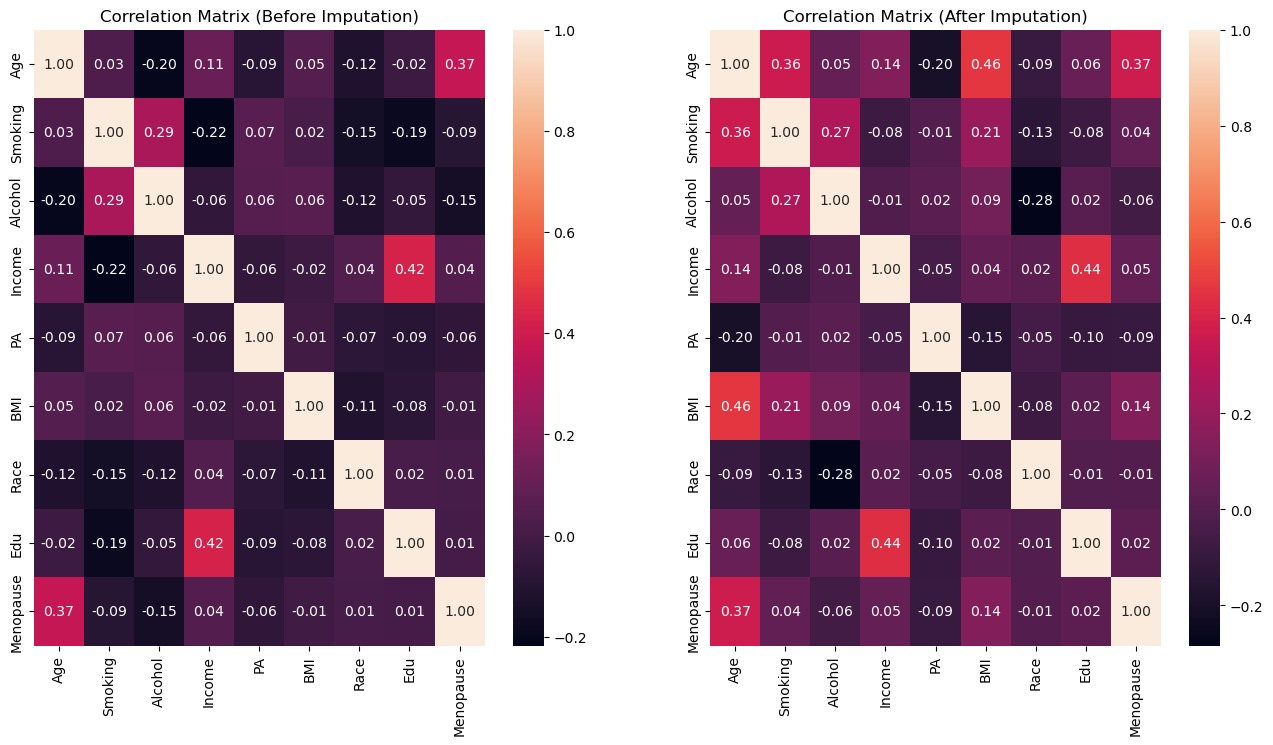

The average absolute difference in Pearson correlation coefficients is: 0.046
Minor changes in correlations suggest that imputation has preserved the underlying relationships well.


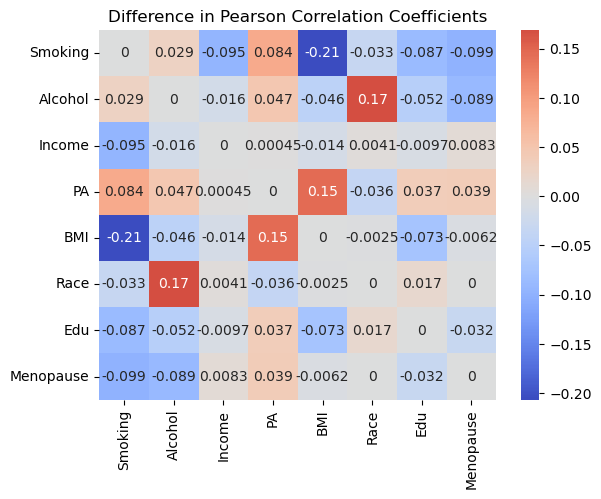

In [83]:
# Calculate correlation matrices
corr_before = df.drop(['ID', 'DM'], axis=1).dropna().corr() 
corr_after = df_imputed.corr()

# Plot the correlation matrices
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.heatmap(corr_before, annot=True, fmt=".3f")
plt.title('Correlation Matrix (Before Imputation)')

plt.subplot(122)
sns.heatmap(corr_after, annot=True, fmt=".3f")
plt.title('Correlation Matrix (After Imputation)')
plt.show()

# We can also use pearson
def correlation_stability(df_original, df_imputed, columns):
    # Calculate correlation matrices
    corr_original = df_original[columns].corr(method='pearson')
    corr_imputed = df_imputed[columns].corr(method='pearson')
    
    # Calculate the difference in correlation coefficients
    corr_diff = corr_original - corr_imputed
    
    # Calculate the average absolute difference
    average_diff = corr_diff.abs().mean().mean()
    print(f"The average absolute difference in Pearson correlation coefficients is: {average_diff:.3f}")

    # Define thresholds for significance of differences
    if average_diff < 0.1:
        conclusion = "Minor changes in correlations suggest that imputation has preserved the underlying relationships well."
    elif average_diff < 0.3:
        conclusion = "Moderate changes in correlations suggest some potential alterations in relationships due to imputation."
    else:
        conclusion = "Major changes in correlations indicate significant alterations in relationships, which may impact subsequent analyses."

    # Print out the conclusion
    print(conclusion)
    
    return corr_diff

# Assuming 'df' is your original DataFrame and 'df_imputed' is the DataFrame after imputation
# and 'columns' is a list of columns for which you want to check the correlation stability
corr_diff = correlation_stability(df, df_imputed, columns_to_analyze)

# Visualize the difference in correlation coefficients
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', center=0)
plt.title('Difference in Pearson Correlation Coefficients')
plt.show()


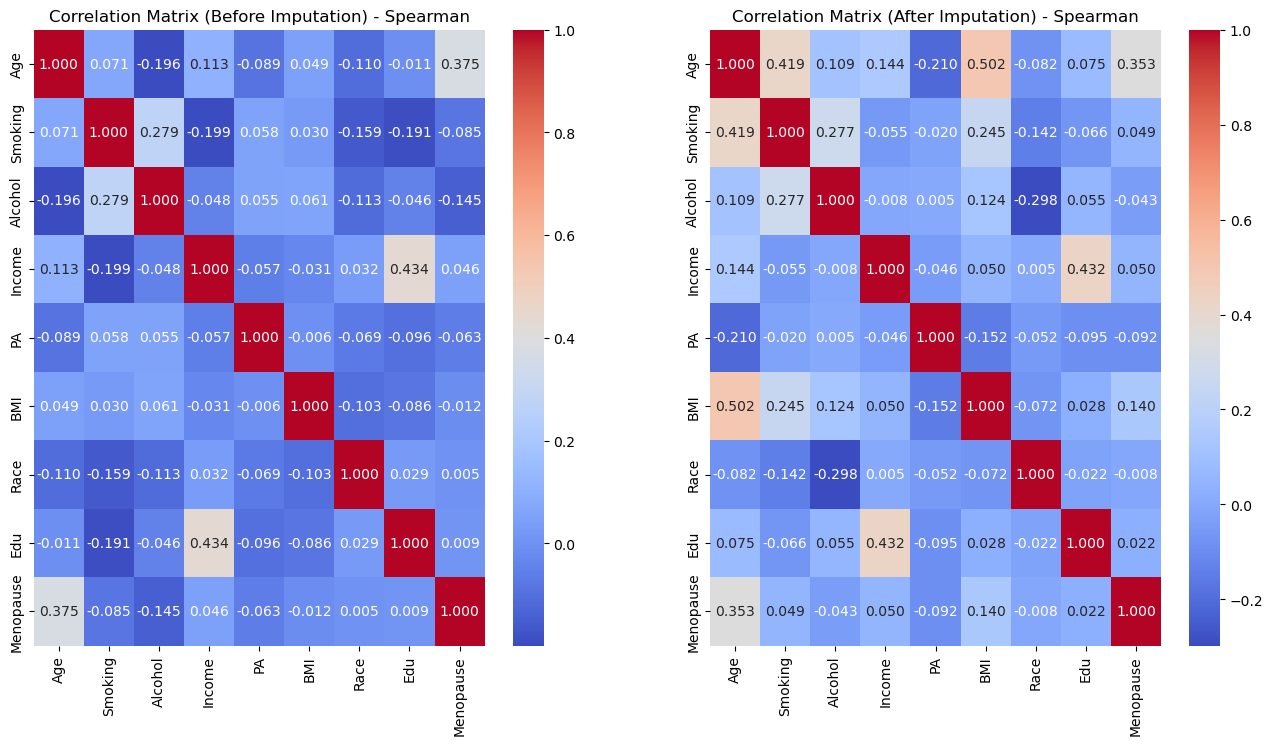

The average absolute difference in Spearman correlation coefficients is: 0.051
Minor changes in correlations suggest that imputation has preserved the underlying relationships well.


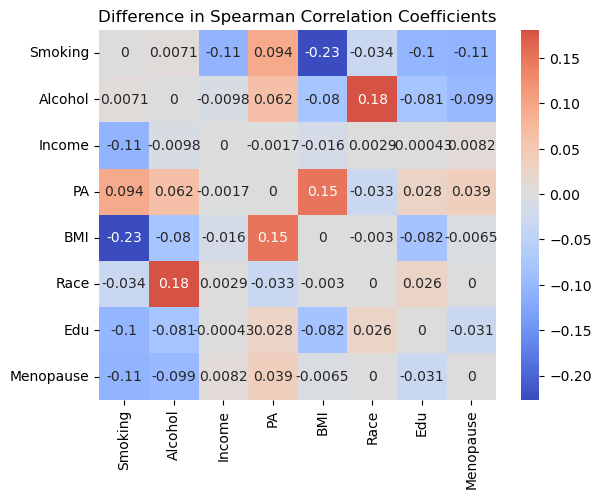

In [84]:
# Calculate correlation matrices using Spearman's method
corr_before = df.drop(['ID', 'DM'], axis=1).dropna().corr(method='spearman') 
corr_after = df_imputed.corr(method='spearman')

# Plot the correlation matrices
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.heatmap(corr_before, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Correlation Matrix (Before Imputation) - Spearman')

plt.subplot(122)
sns.heatmap(corr_after, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Correlation Matrix (After Imputation) - Spearman')
plt.show()

# Function to evaluate correlation stability using Spearman's correlation
def correlation_stability(df_original, df_imputed, columns):
    # Calculate correlation matrices using Spearman's method
    corr_original = df_original[columns].corr(method='spearman')
    corr_imputed = df_imputed[columns].corr(method='spearman')
    
    # Calculate the difference in correlation coefficients
    corr_diff = corr_original - corr_imputed
    
    # Calculate the average absolute difference
    average_diff = corr_diff.abs().mean().mean()
    print(f"The average absolute difference in Spearman correlation coefficients is: {average_diff:.3f}")

    # Define thresholds for significance of differences
    if average_diff < 0.1:
        conclusion = "Minor changes in correlations suggest that imputation has preserved the underlying relationships well."
    elif average_diff < 0.3:
        conclusion = "Moderate changes in correlations suggest some potential alterations in relationships due to imputation."
    else:
        conclusion = "Major changes in correlations indicate significant alterations in relationships, which may impact subsequent analyses."

    # Print out the conclusion
    print(conclusion)
    
    return corr_diff

# Assuming 'columns_to_analyze' is a list of columns for which you want to check the correlation stability
corr_diff = correlation_stability(df, df_imputed, columns_to_analyze)

# Visualize the difference in correlation coefficients
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', center=0)
plt.title('Difference in Spearman Correlation Coefficients')
plt.show()